In [78]:
import pandas as pd
import numpy as np
import os

Se realiza carga de la base de datos ML_cars


In [79]:
autos =pd.read_csv('ML_cars.csv',encoding='utf-8')

In [80]:
autos.shape

(205, 26)

In [81]:
print(autos.isna().sum())

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [82]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [83]:
autos.head(2)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


In [84]:
autos['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

In [85]:
autos['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [86]:
autos['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [87]:
autos['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

drivewheel

In [88]:
##autos['drivewheel'].unique()

In [89]:
##autos['enginelocation'].unique()

In [90]:
##autos['wheelbase'].unique()

In [91]:
#autos['enginetype'].unique()

In [92]:
##autos['cylindernumber'].unique()

In [93]:
autos['enginesize'].unique()

array([130, 152, 109, 136, 131, 108, 164, 209,  61,  90,  98, 122, 156,
        92,  79, 110, 111, 119, 258, 326,  91,  70,  80, 140, 134, 183,
       234, 308, 304,  97, 103, 120, 181, 151, 194, 203, 132, 121, 146,
       171, 161, 141, 173, 145], dtype=int64)

In [94]:
##autos['fuelsystem'].unique()

La relación diámetro por carrera es una medida clave en el diseño de motores, y se refiere a la proporción entre el diámetro del cilindro y la distancia que se mueve el pistón dentro del cilindro, conocida como carrera. Esta relación afecta directamente al rendimiento del motor y a sus características operativas.

In [95]:
autos['boreratio'].unique()

array([3.47, 2.68, 3.19, 3.13, 3.5 , 3.31, 3.62, 2.91, 3.03, 2.97, 3.34,
       3.6 , 2.92, 3.15, 3.43, 3.63, 3.54, 3.08, 3.33, 3.39, 3.76, 3.58,
       3.46, 3.8 , 3.78, 3.17, 3.35, 3.59, 2.99, 3.7 , 3.61, 3.94, 3.74,
       2.54, 3.05, 3.27, 3.24, 3.01])

La cilindrada o cubicaje de un coche es el volumen de sus cilindros. Para calcular la cilindrada debemos calcular el volumen de un cilindro y multiplicarlo por el número de cilindros de ese motor. El volumen de un cilindro es igual al producto de multiplicar el área de la circunferencia por la altura del cilindro, es decir, por la carrera.

In [96]:
autos['stroke'].unique()

array([2.68 , 3.47 , 3.4  , 2.8  , 3.19 , 3.39 , 3.03 , 3.11 , 3.23 ,
       3.46 , 3.9  , 3.41 , 3.07 , 3.58 , 4.17 , 2.76 , 3.15 , 3.255,
       3.16 , 3.64 , 3.1  , 3.35 , 3.12 , 3.86 , 3.29 , 3.27 , 3.52 ,
       2.19 , 3.21 , 2.9  , 2.07 , 2.36 , 2.64 , 3.08 , 3.5  , 3.54 ,
       2.87 ])

La relación de compresión es aquella que compara la capacidad del interior del cilindro cuando el pistón va del punto muerto superior al inferior. Por su parte, la presión de la compresión es el valor que se da en el punto muerto superior.

In [97]:
autos['compressionratio'].unique()

array([ 9.  , 10.  ,  8.  ,  8.5 ,  8.3 ,  7.  ,  8.8 ,  9.5 ,  9.6 ,
        9.41,  9.4 ,  7.6 ,  9.2 , 10.1 ,  9.1 ,  8.1 , 11.5 ,  8.6 ,
       22.7 , 22.  , 21.5 ,  7.5 , 21.9 ,  7.8 ,  8.4 , 21.  ,  8.7 ,
        9.31,  9.3 ,  7.7 , 22.5 , 23.  ])

In [98]:
autos['horsepower'].unique()

array([111, 154, 102, 115, 110, 140, 160, 101, 121, 182,  48,  70,  68,
        88, 145,  58,  76,  60,  86, 100,  78,  90, 176, 262, 135,  84,
        64, 120,  72, 123, 155, 184, 175, 116,  69,  55,  97, 152, 200,
        95, 142, 143, 207, 288,  73,  82,  94,  62,  56, 112,  92, 161,
       156,  52,  85, 114, 162, 134, 106], dtype=int64)

In [99]:
autos['peakrpm'].unique()

array([5000, 5500, 5800, 4250, 5400, 5100, 4800, 6000, 4750, 4650, 4200,
       4350, 4500, 5200, 4150, 5600, 5900, 5750, 5250, 4900, 4400, 6600,
       5300], dtype=int64)

In [100]:
autos['citympg'].unique()

array([21, 19, 24, 18, 17, 16, 23, 20, 15, 47, 38, 37, 31, 49, 30, 27, 25,
       13, 26, 36, 22, 14, 45, 28, 32, 35, 34, 29, 33], dtype=int64)

In [101]:
autos.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [102]:
cars=autos[['symboling','fueltype','doornumber','carbody','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower',
               'peakrpm','citympg','highwaympg','price']]

In [103]:
cars.head()

,symboling,fueltype,doornumber,carbody,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,two,convertible,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,two,convertible,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,two,hatchback,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,four,sedan,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,four,sedan,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


Se cra una variable ponderada del consumo por galon en ciudad y en ruta, se maneja un 70% para el consumo en ciudad y un 30% para el consumo en carretera-


In [104]:
cars['mpg']=cars['citympg']*0.7+cars['highwaympg']*0.3

C:\Users\57319\AppData\Local\Temp\ipykernel_16600\1172287318.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars['mpg']=cars['citympg']*0.7+cars['highwaympg']*0.3


Se eliminan las variables referentes a consumo en carretera y en ciudad.


In [105]:
cars.drop(['citympg', 'highwaympg'], axis=1, inplace=True)

C:\Users\57319\AppData\Local\Temp\ipykernel_16600\698672091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars.drop(['citympg', 'highwaympg'], axis=1, inplace=True)


In [106]:
cars=pd.get_dummies(cars, columns=['fueltype'], dtype=int)

In [107]:
cars.loc[cars['doornumber'].str.contains('two', case=False), 'doornumber']=cars['doornumber'].str.replace('two','2', case=False)

In [108]:
cars.loc[cars['doornumber'].str.contains('four', case=False), 'doornumber']=cars['doornumber'].str.replace('four','4', case=False)

In [109]:
puertas=cars['doornumber'].astype(int)

In [110]:
cars['doornumber']=puertas

In [111]:
cars.head(3)

,symboling,doornumber,carbody,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,mpg,fueltype_diesel,fueltype_gas
0,3,2,convertible,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,13495.0,22.8,0,1
1,3,2,convertible,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,16500.0,22.8,0,1
2,1,2,hatchback,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,16500.0,21.1,0,1


In [112]:
cars['carbody']=pd.factorize(cars['carbody'])[0]

In [113]:
cars=cars.rename(columns={'fueltype_diesel':'fueltype'})

In [114]:
cars.drop(['fueltype_gas'], axis=1, inplace=True)

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [115]:
cars['carbody'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [116]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   doornumber        205 non-null    int32  
 2   carbody           205 non-null    int64  
 3   carlength         205 non-null    float64
 4   carwidth          205 non-null    float64
 5   carheight         205 non-null    float64
 6   curbweight        205 non-null    int64  
 7   enginesize        205 non-null    int64  
 8   boreratio         205 non-null    float64
 9   stroke            205 non-null    float64
 10  compressionratio  205 non-null    float64
 11  horsepower        205 non-null    int64  
 12  peakrpm           205 non-null    int64  
 13  price             205 non-null    float64
 14  mpg               205 non-null    float64
 15  fueltype          205 non-null    int32  
dtypes: float64(8), int32(2), int64(6)
memory usa

In [117]:
mediana=cars['price'].median()

In [118]:
mediana

10295.0

Para establecer la variable binaria en cuanto a la gama del vehiculo, se tomaron como autos de gama alta, aquellos cuyo precio supera la mediana.

In [119]:
cars['high_end']=(cars['price']>mediana).astype(int)

In [120]:
cars.head(10)

,symboling,doornumber,carbody,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,mpg,fueltype,high_end
0,3,2,0,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,13495.000,22.8,0,1
1,3,2,0,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,16500.000,22.8,0,1
2,1,2,1,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,16500.000,21.1,0,1
3,2,4,2,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,13950.000,25.8,0,1
4,2,4,2,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,17450.000,19.2,0,1
5,2,2,2,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110,5500,15250.000,20.8,0,1
6,1,4,2,192.7,71.4,55.7,2844,136,3.19,3.40,8.5,110,5500,17710.000,20.8,0,1
7,1,4,3,192.7,71.4,55.7,2954,136,3.19,3.40,8.5,110,5500,18920.000,20.8,0,1
8,1,4,2,192.7,71.4,55.9,3086,131,3.13,3.40,8.3,140,5500,23875.000,17.9,0,1
9,0,2,1,178.2,67.9,52.0,3053,131,3.13,3.40,7.0,160,5500,17859.167,17.8,0,1


In [121]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [122]:
medidas=cars[['carlength','carwidth','carheight','curbweight']]

In [123]:
medidas.head()

,carlength,carwidth,carheight,curbweight
0,168.8,64.1,48.8,2548
1,168.8,64.1,48.8,2548
2,171.2,65.5,52.4,2823
3,176.6,66.2,54.3,2337
4,176.6,66.4,54.3,2824


In [124]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(medidas)

In [125]:
pca=PCA(n_components=1)
comp_principales=pca.fit_transform(scaled_data)

In [126]:
componente_medidas=pd.DataFrame(data=comp_principales, columns=['PC1'])

In [127]:
componente_medidas

,PC1
0,-1.321486
1,-1.321486
2,-0.117727
3,0.032274
4,0.595515
...,...
200,2.068117
201,2.145153
202,2.131316
203,2.347247


In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

In [129]:
matriz_correlacion=medidas.corr()
print(matriz_correlacion)

            carlength  carwidth  carheight  curbweight
carlength    1.000000  0.841118   0.491029    0.877728
carwidth     0.841118  1.000000   0.279210    0.867032
carheight    0.491029  0.279210   1.000000    0.295572
curbweight   0.877728  0.867032   0.295572    1.000000


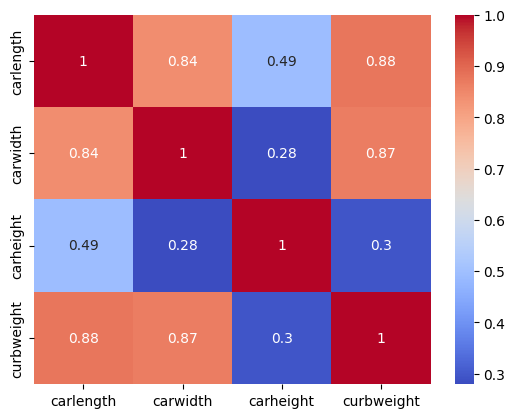

In [130]:
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm')
plt.show()

In [131]:
automoviles=cars.drop(columns=['carlength','carwidth','carheight','curbweight'])

In [132]:
automoviles.head(3)

,symboling,doornumber,carbody,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,mpg,fueltype,high_end
0,3,2,0,130,3.47,2.68,9.0,111,5000,13495.0,22.8,0,1
1,3,2,0,130,3.47,2.68,9.0,111,5000,16500.0,22.8,0,1
2,1,2,1,152,2.68,3.47,9.0,154,5000,16500.0,21.1,0,1


In [133]:
automoviles['Summary_measures']=componente_medidas['PC1']

In [134]:
automoviles.head(5)

,symboling,doornumber,carbody,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,mpg,fueltype,high_end,Summary_measures
0,3,2,0,130,3.47,2.68,9.0,111,5000,13495.0,22.8,0,1,-1.321486
1,3,2,0,130,3.47,2.68,9.0,111,5000,16500.0,22.8,0,1,-1.321486
2,1,2,1,152,2.68,3.47,9.0,154,5000,16500.0,21.1,0,1,-0.117727
3,2,4,2,109,3.19,3.40,10.0,102,5500,13950.0,25.8,0,1,0.032274
4,2,4,2,136,3.19,3.40,8.0,115,5500,17450.0,19.2,0,1,0.595515


In [135]:

correlacion_m=automoviles.corr()
print(correlacion_m)

                  symboling  doornumber   carbody  enginesize  boreratio  \
symboling          1.000000   -0.664073 -0.398970   -0.105790  -0.130051   
doornumber        -0.664073    1.000000  0.447534    0.020742   0.119258   
carbody           -0.398970    0.447534  1.000000    0.172381   0.224976   
enginesize        -0.105790    0.020742  0.172381    1.000000   0.583774   
boreratio         -0.130051    0.119258  0.224976    0.583774   1.000000   
stroke            -0.008735   -0.011082  0.000598    0.203129  -0.055909   
compressionratio  -0.178515    0.177888  0.156686    0.028971   0.005197   
horsepower         0.070873   -0.126947  0.047234    0.809769   0.573677   
peakrpm            0.273606   -0.247668 -0.147031   -0.244660  -0.254976   
price             -0.079978    0.031835  0.161294    0.874145   0.553173   
mpg               -0.014014   -0.019974 -0.106152   -0.665158  -0.588930   
fueltype          -0.194311    0.191491  0.157580    0.069594   0.054451   
high_end    

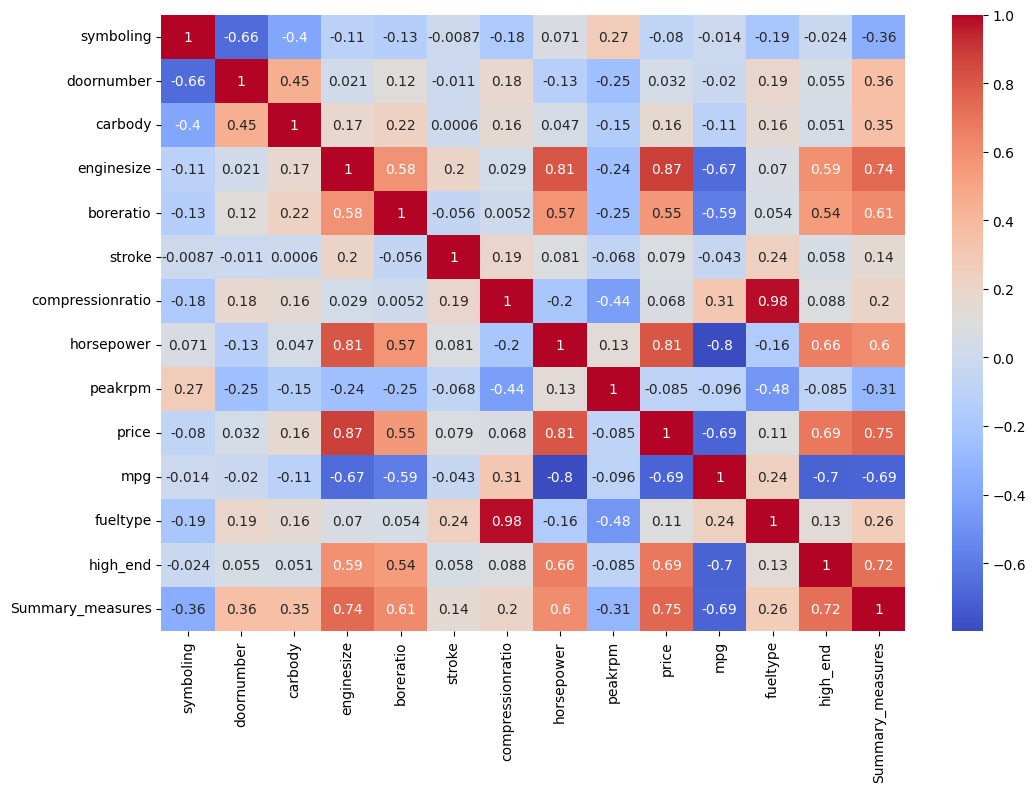

In [136]:
plt.figure(figsize=(12,8))
sns.heatmap(correlacion_m, annot=True, cmap='coolwarm',)
plt.show()

Para chequear significancia de los parametros de la regresion se usa el paquete statsmodels

In [137]:
import statsmodels.api as sm

In [138]:
automoviles.columns

Index(['symboling', 'doornumber', 'carbody', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'price', 'mpg',
       'fueltype', 'high_end', 'Summary_measures'],
      dtype='object')

In [139]:
X=automoviles[['enginesize','boreratio','horsepower','mpg','high_end','Summary_measures']]

In [140]:
X.head()

,enginesize,boreratio,horsepower,mpg,high_end,Summary_measures
0,130,3.47,111,22.8,1,-1.321486
1,130,3.47,111,22.8,1,-1.321486
2,152,2.68,154,21.1,1,-0.117727
3,109,3.19,102,25.8,1,0.032274
4,136,3.19,115,19.2,1,0.595515


In [141]:
Y=automoviles['price']

Se añade el parametro de posicion

In [142]:
X=sm.add_constant(X)

In [143]:
model_price1=sm.OLS(Y,X).fit()

Se realiza la primera regresion usando las variables con un coeficiente de correlacion arriba de 0.6 en valor absoluto y descartando las demas,por tal razon la regrecion del precio se hace en funcion de las variables enginesize, boreratio, horsepower, mpg, high_end, Summary_measures.

In [144]:
print(model_price1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     160.4
Date:                Sun, 06 Oct 2024   Prob (F-statistic):           3.23e-73
Time:                        11:16:36   Log-Likelihood:                -1951.2
No. Observations:                 205   AIC:                             3916.
Df Residuals:                     198   BIC:                             3940.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1878.2343   4658.689  

In [145]:
independ= automoviles[['enginesize','horsepower','Summary_measures']]

Del anterior modelo, se descartan las variables cuyo parametro resulto no significativos estadisticamente. se propone un nuevo modelo usando solo la variables significativas y descartando el parametro de posicion.

In [146]:
model1=sm.OLS(Y,independ).fit()

In [147]:
print(model1.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.948
Model:                            OLS   Adj. R-squared (uncentered):              0.947
Method:                 Least Squares   F-statistic:                              1231.
Date:                Sun, 06 Oct 2024   Prob (F-statistic):                   1.70e-129
Time:                        11:16:36   Log-Likelihood:                         -1965.3
No. Observations:                 205   AIC:                                      3937.
Df Residuals:                     202   BIC:                                      3947.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

Se obtienen los residuos del primer modelo, con el objetivo de emplearlos posteriormente.

In [148]:
residuals_model1=model1.resid

Ahora se usa ese modelo y se entrena

In [149]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [150]:
from sklearn.model_selection import train_test_split

In [151]:
independ_train, independ_test, Y_train, Y_test=train_test_split(independ, Y, test_size=0.2, random_state=42)


In [152]:
model_reg=LinearRegression()
model_reg.fit(independ_train, Y_train)

LinearRegression()

In [153]:
Y_predict=model_reg.predict(independ_test)

Se calcula el error cuadratico medio y el r2

In [154]:
mse=mean_squared_error(Y_test,Y_predict)

In [155]:
r2=r2_score(Y_test,Y_predict)

In [156]:
print(f'El error cuadratico medio es: {mse} ')
print(f'El r2 es: {r2}')

El error cuadratico medio es: 14344377.442712018 
El r2 es: 0.8182968477805482


Se crea un grafico de los valores reales vs los predichos

In [157]:
import matplotlib.pyplot as plt

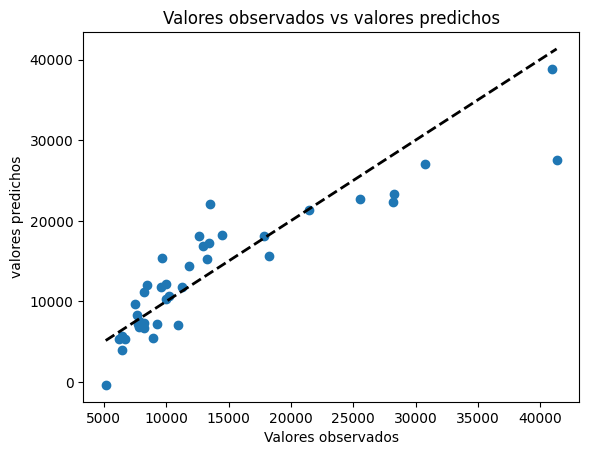

In [158]:
plt.scatter(Y_test, Y_predict)
plt.xlabel('Valores observados')
plt.ylabel('valores predichos')
plt.title('Valores observados vs valores predichos')
#Se agrega linea diagonal para indicar el ajuste perfecto
plt.plot([Y_test.min(), Y_test.max()],[Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.show()

Para determinar que variables se seleccionana para la regresion logistica, se realiza primero una regresion multiple con el objetivo de observar la significancia estadistica de los parametros.

In [159]:
gama=automoviles['high_end']

In [160]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [161]:
from sklearn.metrics import confusion_matrix

In [162]:
X_clasific=automoviles[['enginesize','boreratio','horsepower','mpg','Summary_measures']]

In [163]:
target=automoviles['high_end']

In [164]:
clasificacion_gama=automoviles.groupby('high_end').count()

In [165]:
clasificacion_gama

,symboling,doornumber,carbody,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,mpg,fueltype,Summary_measures
high_end,,,,,,,,,,,,,
0,103,103,103,103,103,103,103,103,103,103,103,103,103
1,102,102,102,102,102,102,102,102,102,102,102,102,102


In [166]:
from sklearn.metrics import accuracy_score

In [167]:
X_clasific_train,X_clasific_test, target_train, target_test=train_test_split(X_clasific, target, test_size=0.3, random_state=0)

Se crea y se entrena el modelo

In [168]:
log_reg=LogisticRegression()
log_reg.fit(X_clasific_train,target_train)

LogisticRegression()

Se realiza el pronostico para la evaluacion del modelo

In [169]:
target_pred_log=log_reg.predict(X_clasific_test)
accurancy_log=accuracy_score(target_test, target_pred_log)
print(f'La precision (accuracy) de la regresion logistica es: {accurancy_log}')

La precision (accuracy) de la regresion logistica es: 0.9032258064516129


In [170]:
matriz_confusion=confusion_matrix(target_test, target_pred_log)

In [171]:
print(matriz_confusion)

[[28  2]
 [ 4 28]]


In [172]:
print(classification_report(target_test, target_pred_log))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90        30
           1       0.93      0.88      0.90        32

    accuracy                           0.90        62
   macro avg       0.90      0.90      0.90        62
weighted avg       0.91      0.90      0.90        62



In [173]:
import statsmodels.api as sm

A continuacion se entrena un modelo probit como posible candidato

In [174]:
X_probit=automoviles[['Summary_measures','horsepower']]

In [175]:
X_probit['price_residuals']=residuals_model1

C:\Users\57319\AppData\Local\Temp\ipykernel_16600\3632374148.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_probit['price_residuals']=residuals_model1


Se toman las variables que estan mas relacionadas con la gamma del auto y los residuos de la regresion del modelo 1


In [176]:
X_probit.head(3)

,Summary_measures,horsepower,price_residuals
0,-1.321486,111,1626.765521
1,-1.321486,111,4631.765521
2,-0.117727,154,-1067.897607


In [177]:
X_probit_train,X_probit_test, target_train, target_test=train_test_split(X_probit, target, test_size=0.3, random_state=0)

In [178]:
probit_model=sm.Probit(target_train, X_probit_train).fit()

Optimization terminated successfully.
         Current function value: 0.161744
         Iterations 9


In [179]:
probit_predictions=probit_model.predict(X_probit_test)
probit_predictions_binary=[1 if x>0.5 else 0 for x in probit_predictions]

In [180]:
probit_accuracy=accuracy_score(target_test, probit_predictions_binary)
probit_conf_matrix=confusion_matrix(target_test, probit_predictions_binary)

In [181]:
print(f'La precision (accuracy) del modelo probit es: {probit_accuracy}')

La precision (accuracy) del modelo probit es: 0.9354838709677419


In [182]:
print(probit_conf_matrix)

[[29  1]
 [ 3 29]]


In [183]:
print(classification_report(target_test, probit_predictions_binary))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        30
           1       0.97      0.91      0.94        32

    accuracy                           0.94        62
   macro avg       0.94      0.94      0.94        62
weighted avg       0.94      0.94      0.94        62



Ahora se plantea un arbol de decision 


In [184]:
from sklearn.tree import DecisionTreeClassifier

Para este modelo se utilizan los mismos datos que se utilizaron en la regresion logistica, pero se deja solo un 25% para testing

In [185]:
X_clasific_train,X_clasific_test, target_train, target_test=train_test_split(X_clasific, target, test_size=0.25, random_state=0)

In [186]:
tree_model=DecisionTreeClassifier()
tree_model.fit(X_clasific_train, target_train)

DecisionTreeClassifier()

predicciones

In [187]:
tree_predictions=tree_model.predict(X_clasific_test)

Precision

In [188]:
tree_accuracy= accuracy_score(target_test,tree_predictions)
print(f'La precision (accuracy) del arbol de decision es: {tree_accuracy}')

La precision (accuracy) del arbol de decision es: 0.8846153846153846


Matriz de confusion

In [189]:
tree_conf_matrix=confusion_matrix(target_test, tree_predictions)
print(tree_conf_matrix)

[[23  3]
 [ 3 23]]


Reporte de clasificacion

In [190]:
tree_class_report=classification_report(target_test, tree_predictions)
print(tree_class_report)

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        26
           1       0.88      0.88      0.88        26

    accuracy                           0.88        52
   macro avg       0.88      0.88      0.88        52
weighted avg       0.88      0.88      0.88        52



In [191]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

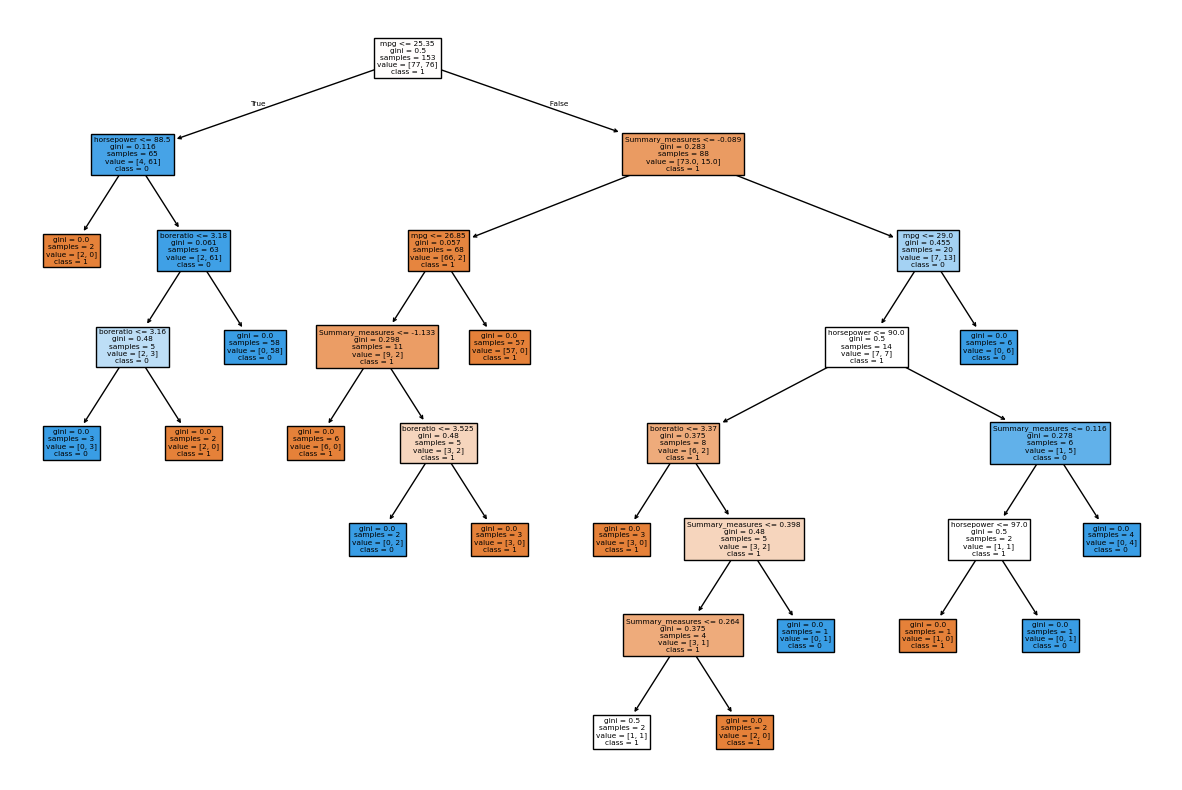

In [192]:
plt.figure(figsize=(15,10))
plot_tree(tree_model,feature_names=['enginesize','boreratio','horsepower','mpg','Summary_measures'], class_names=['1','0'], filled=True)
plt.show()

Se realiza un segundo modelo de arboL usando los datos que se emplearon en el modelo probit

In [193]:
X_probit_train,X_probit_test, target_train, target_test=train_test_split(X_probit, target, test_size=0.25, random_state=0)

In [194]:
tree_model1=DecisionTreeClassifier()
tree_model1.fit(X_probit_train, target_train)

DecisionTreeClassifier()

In [195]:
tree_probit_predictions=tree_model1.predict(X_probit_test)

In [196]:
tree1_accuracy= accuracy_score(target_test,tree_probit_predictions)
print(f'La precision (accuracy) del arbol de decision1 es: {tree1_accuracy}')

La precision (accuracy) del arbol de decision1 es: 0.9230769230769231


In [197]:
treeprobit_conf_matrix=confusion_matrix(target_test, tree_probit_predictions)
print(treeprobit_conf_matrix)

[[23  3]
 [ 1 25]]


In [198]:
tree1_class_report=classification_report(target_test, tree_probit_predictions)
print(tree1_class_report)

              precision    recall  f1-score   support

           0       0.96      0.88      0.92        26
           1       0.89      0.96      0.93        26

    accuracy                           0.92        52
   macro avg       0.93      0.92      0.92        52
weighted avg       0.93      0.92      0.92        52



Summary_measures	horsepower	price_residuals

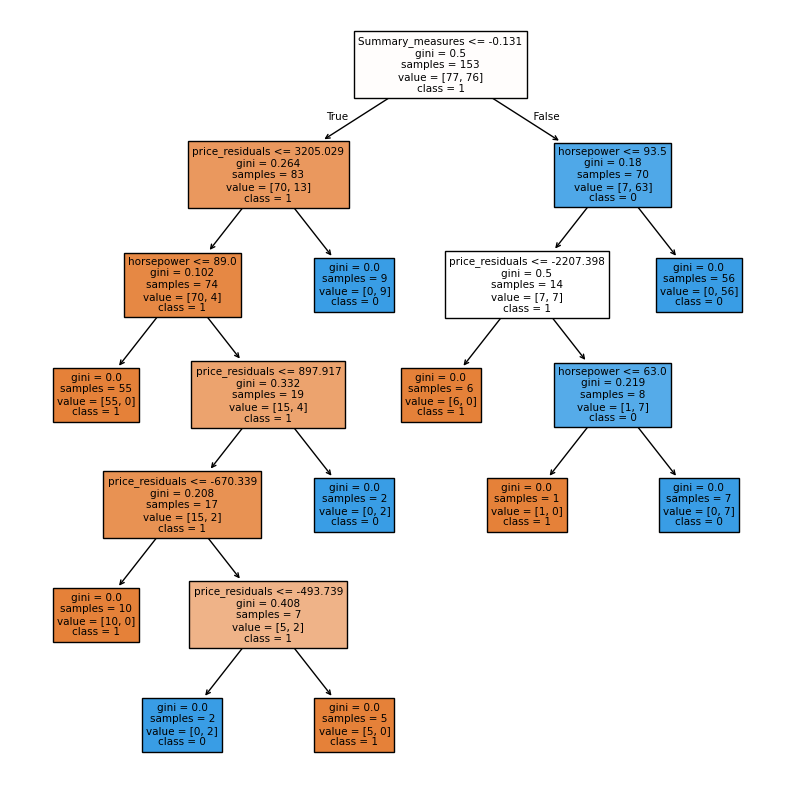

In [199]:
plt.figure(figsize=(10,10))
plot_tree(tree_model1,feature_names=['Summary_measures','horsepower','price_residuals'], class_names=['1','0'], filled=True)
plt.show()

Ahora se crea un nuevo dataset con los modelos y las variables significativas para explicar el precio, el cual a su vez, determina la gamma del vehiculo, el objetivo es mostrar un rankin de los modelos mas vendidos tanto de gamma baja como de gama alta.

In [200]:
ranking=automoviles[['price','enginesize','horsepower','high_end']]

In [201]:
ranking['Model']=autos['CarName']

C:\Users\57319\AppData\Local\Temp\ipykernel_16600\3925191730.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ranking['Model']=autos['CarName']


In [202]:
ranking.head()

,price,enginesize,horsepower,high_end,Model
0,13495.0,130,111,1,alfa-romero giulia
1,16500.0,130,111,1,alfa-romero stelvio
2,16500.0,152,154,1,alfa-romero Quadrifoglio
3,13950.0,109,102,1,audi 100 ls
4,17450.0,136,115,1,audi 100ls


In [203]:
gama_alta=ranking[ranking['high_end']==1]
gama_baja=ranking[ranking['high_end']==0]

In [204]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [205]:
gama_alta.head()

,price,enginesize,horsepower,high_end,Model
0,13495.0,130,111,1,alfa-romero giulia
1,16500.0,130,111,1,alfa-romero stelvio
2,16500.0,152,154,1,alfa-romero Quadrifoglio
3,13950.0,109,102,1,audi 100 ls
4,17450.0,136,115,1,audi 100ls


In [206]:
gama_alta.describe()

,price,enginesize,horsepower,high_end
count,102.000000,102.000000,102.000000,102.0
mean,18810.555559,151.421569,130.215686,1.0
std,8094.151207,45.785431,39.102209,0.0
min,10345.000000,70.000000,64.000000,1.0
25%,13223.750000,121.000000,101.000000,1.0
50%,16509.000000,141.000000,116.000000,1.0
75%,20652.250000,171.000000,155.750000,1.0
max,45400.000000,326.000000,288.000000,1.0


In [207]:
gama_baja.head()

,price,enginesize,horsepower,high_end,Model
18,5151.0,61,48,0,chevrolet impala
19,6295.0,90,70,0,chevrolet monte carlo
20,6575.0,90,70,0,chevrolet vega 2300
21,5572.0,90,68,0,dodge rampage
22,6377.0,90,68,0,dodge challenger se


In [208]:
gama_baja.describe()

,price,enginesize,horsepower,high_end
count,103.000000,103.000000,103.000000,103.0
mean,7796.592233,102.631068,78.271845,0.0
std,1349.437052,14.014691,16.057003,0.0
min,5118.000000,61.000000,48.000000,0.0
25%,6790.000000,92.000000,68.000000,0.0
50%,7788.000000,98.000000,70.000000,0.0
75%,8916.500000,110.000000,88.000000,0.0
max,10295.000000,146.000000,116.000000,0.0


In [209]:
conteo_gama_baja=gama_baja.groupby(['Model']).size().reset_index(name='conteo')

In [210]:
conteo_gama_baja['conteo'].sum()

103

In [211]:
conteo_gama_baja_ranking=conteo_gama_baja.sort_values(by='conteo', ascending=False)

In [212]:
conteo_gama_baja_ranking

,Model,conteo
67,toyota corona,5
62,toyota corolla,4
56,subaru dl,3
15,honda civic,2
48,plymouth fury iii,2
35,mitsubishi outlander,2
53,subaru,2
33,mitsubishi mirage g4,2
30,mitsubishi g4,2
28,mazda rx-4,2


In [213]:
conteo_gama_alta=gama_alta.groupby(['Model']).size().reset_index(name='conteo')

In [214]:
conteo_gama_alta['conteo'].sum()

102

In [215]:
conteo_gama_alta_ranking=conteo_gama_alta.sort_values(by='conteo', ascending=False)

In [216]:
conteo_gama_alta_ranking

,Model,conteo
47,peugeot 504,6
57,saab 99gle,2
54,porsche cayenne,2
30,mazda 626,2
35,mazda rx-7 gs,2
50,peugeot 604sl,2
58,saab 99le,2
11,bmw x3,2
73,volvo 144ea,2
9,bmw 320i,2
